<a href="https://colab.research.google.com/github/Shnku/pythoning_stuff/blob/proj/NN/build_cnn/make_train_test_split_from_all_img_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

#shared path to drive
SHARED_PATH="/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"
#direct path to drive
DIRECT_PATH="/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"

# Determine the data path based on the existence of shared or direct paths
root_path = SHARED_PATH if os.path.exists(SHARED_PATH) else DIRECT_PATH if os.path.exists(DIRECT_PATH) else None

DATA_PATH = ''
# Print the chosen path or an error message
if root_path:
    DATA_PATH = root_path + "/Proj1_CGC_Building_with_sides_classify"
    print(f"Using path: {root_path}\n\n{os.listdir(DATA_PATH)}")
else:
    print("Neither shared nor direct path exists. Please check the paths.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using path: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours

['expr1_resnet18.ipynb', 'ALL_IMG_DATA', 'make_train-test-split_from_all_img_data.ipynb', 'training_images', 'validte_images']


In [ ]:
import pandas as pd
from IPython.display import display

root_dir = DATA_PATH+'/ALL_IMG_DATA'
image_dict = {}
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        image_dict[folder] = []
        for filename in os.listdir(folder_path):
            # if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            rel_path = folder_path.split('/')
            image_path = os.path.join('/',rel_path[-2], rel_path[-1],filename)
            image_dict[folder].append(image_path)

data = []
for class_name, images in image_dict.items():
    for img_path in images:
        data.append({ 'path': img_path,'class': class_name})

df = pd.DataFrame(data)

# print(image_dict.keys)
# print(data)
print(df)
display(df.describe())

                                                 path           class
0        /ALL_IMG_DATA/gurudeb_front/gurudeb_005.jpeg   gurudeb_front
1        /ALL_IMG_DATA/gurudeb_front/gurudeb_004.jpeg   gurudeb_front
2          /ALL_IMG_DATA/gurudeb_front/frame_0210.jpg   gurudeb_front
3        /ALL_IMG_DATA/gurudeb_front/gurudeb_002.jpeg   gurudeb_front
4    /ALL_IMG_DATA/gurudeb_front/gurufront_00040.jpeg   gurudeb_front
..                                                ...             ...
364  /ALL_IMG_DATA/chemistry_left/chemleft_00024.jpeg  chemistry_left
365  /ALL_IMG_DATA/chemistry_left/chemleft_00025.jpeg  chemistry_left
366  /ALL_IMG_DATA/chemistry_left/chemleft_00026.jpeg  chemistry_left
367  /ALL_IMG_DATA/chemistry_left/chemleft_00027.jpeg  chemistry_left
368      /ALL_IMG_DATA/chemistry_left/images (2).jpeg  chemistry_left

[369 rows x 2 columns]


,path,class
count,369,369
unique,369,11
top,/ALL_IMG_DATA/chemistry_left/images (2).jpeg,gurudeb_front
freq,1,41


In [ ]:
import os

full_path = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/img_data/heritage_front"

# Get the directory name and the base name
dirname, basename = os.path.split(full_path)
print(dirname)
print(basename)

# Get the parent directory of the base name
parent_dirname = os.path.basename(dirname)
print(parent_dirname)
# Combine the parent directory and the base name
desired_path = os.path.join(parent_dirname, basename)

print(desired_path)

/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/Proj2_Heritage_places_in_CGR_classify/img_data
heritage_front
img_data
img_data/heritage_front


In [ ]:
# save csv data
# df.to_csv(DATA_PATH+'/ALL_IMG_DATA.csv', index=False)
os.listdir(DATA_PATH)

['expr1_resnet18.ipynb',
 'ALL_IMG_DATA',
 'make_train-test-split_from_all_img_data.ipynb',
 'training_images',
 'validte_images']

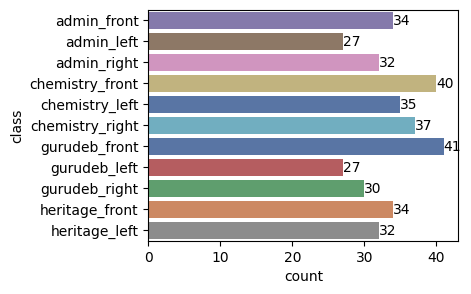

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.countplot(y='class', data=df, hue='class', palette='deep',order=sorted(df['class'].unique()))

# Add bar counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# splitting a dataset in such a way that the proportion of samples in each class is the same across the training and testing sets.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

print('------------',len(train_df),'----------------')
display(train_df.head())
print('------------',len(test_df),'----------------')
display(test_df.head())

# save train and test data csv
# train_df.to_csv(DATA_PATH+'/train_df.csv', index=False)
# test_df.to_csv(DATA_PATH+'/test_df.csv', index=False)

------------ 295 ----------------


,path,class
315,/ALL_IMG_DATA/chemistry_right/chemright00030.jpeg,chemistry_right
68,/ALL_IMG_DATA/heritage_front/heri_front_0007.webp,heritage_front
112,/ALL_IMG_DATA/gurudeb_left/guruleft_00019.jpeg,gurudeb_left
80,/ALL_IMG_DATA/gurudeb_right/gururight_00024.jpeg,gurudeb_right
106,/ALL_IMG_DATA/gurudeb_left/guruleft_00013.jpeg,gurudeb_left


------------ 74 ----------------


,path,class
338,/ALL_IMG_DATA/chemistry_left/frame_0097.jpg,chemistry_left
324,/ALL_IMG_DATA/chemistry_right/chemright0004.jpeg,chemistry_right
111,/ALL_IMG_DATA/gurudeb_left/guruleft_00023.jpeg,gurudeb_left
282,/ALL_IMG_DATA/chemistry_front/chem_fr_00030.jpeg,chemistry_front
90,/ALL_IMG_DATA/gurudeb_right/gururight_0003.jpeg,gurudeb_right


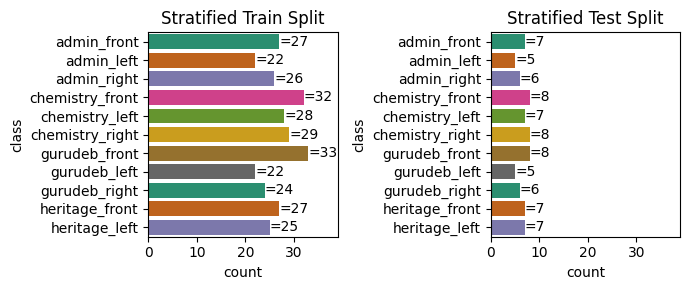

In [ ]:
def plot_class_distribution(data, ax, title, max_count, class_order, palette):
    sns.countplot(y='class', data=data, hue='class', palette=palette, ax=ax, hue_order=class_order, order=class_order)
    ax.set_title(title)
    ax.set_xlim(0, max_count)
    for brs in ax.containers:
        ax.bar_label(brs, fmt='=%d')

# Calculate the maximum count across all splits
max_count = 6 + max(
    train_df['class'].value_counts().max(),
    test_df['class'].value_counts().max()
)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
# Get the unique class names in the desired order (e.g., alphabetical)
class_order = sorted(df['class'].unique())
consistent_palette = sns.color_palette("Dark2", n_colors=len(class_order))

# Use the function to plot the distributions
plot_class_distribution(train_df, axes[0], title='Stratified Train Split', max_count=max_count, class_order=class_order, palette=consistent_palette)
plot_class_distribution(test_df, axes[1], title='Stratified Test Split', max_count=max_count, class_order=class_order, palette=consistent_palette)

plt.tight_layout()
plt.show()

# Make train and validation folder from splited csv data

In [ ]:
import os
import shutil

# Define the target directories
train_dir = os.path.join(DATA_PATH, 'training_images')
val_dir = os.path.join(DATA_PATH, 'validte_images') # Using 'val' for validation as is common

# Create the directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create class subdirectories within train and validation directories
for class_name in df['class'].unique():
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# Function to copy images based on DataFrame
def copy_images(dataframe, destination_dir):
    for index, row in dataframe.iterrows():
        image_path = row['path']
        class_name = row['class']

        source_path = os.path.join(DATA_PATH, image_path.lstrip('/')) # Adjust this line based on your exact path structure

        destination_path = os.path.join(destination_dir, class_name, os.path.basename(source_path))

        try:
            shutil.copy(source_path, destination_path)
            print(f'copy{source_path.split("/")[-3:]} -->> {destination_path.split("/")[-3:]}')
        except FileNotFoundError:
            print(f"Warning: File not found at {source_path}. Skipping.")


# Copy images for the training set
print("Copying training images.................")
copy_images(train_df, train_dir)

# Copy images for the validation set
print("Copying validation images...............")
copy_images(test_df, val_dir)

print("________Image copying complete_________")

Copying training images.................
copy['ALL_IMG_DATA', 'chemistry_right', 'chemright00030.jpeg'] -->> ['training_images', 'chemistry_right', 'chemright00030.jpeg']
copy['ALL_IMG_DATA', 'heritage_front', 'heri_front_0007.webp'] -->> ['training_images', 'heritage_front', 'heri_front_0007.webp']
copy['ALL_IMG_DATA', 'gurudeb_left', 'guruleft_00019.jpeg'] -->> ['training_images', 'gurudeb_left', 'guruleft_00019.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_right', 'gururight_00024.jpeg'] -->> ['training_images', 'gurudeb_right', 'gururight_00024.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_left', 'guruleft_00013.jpeg'] -->> ['training_images', 'gurudeb_left', 'guruleft_00013.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_front', 'gurufront_0005.jpeg'] -->> ['training_images', 'gurudeb_front', 'gurufront_0005.jpeg']
copy['ALL_IMG_DATA', 'gurudeb_front', 'gurufront_00017.jpeg'] -->> ['training_images', 'gurudeb_front', 'gurufront_00017.jpeg']
copy['ALL_IMG_DATA', 'heritage_front', 'heri_front_00021.jpeg'] -->> 

In [ ]:
# You can verify the structure and content of the new directories
print(os.listdir(train_dir))
print(os.listdir(val_dir))
print(os.listdir(os.path.join(train_dir, df['class'].unique()[0]))) # Example for one class

['gurudeb_front', 'heritage_front', 'gurudeb_right', 'gurudeb_left', 'admin_front', 'admin_left', 'admin_right', 'heritage_left', 'chemistry_front', 'chemistry_right', 'chemistry_left']
['gurudeb_front', 'heritage_front', 'gurudeb_right', 'gurudeb_left', 'admin_front', 'admin_left', 'admin_right', 'heritage_left', 'chemistry_front', 'chemistry_right', 'chemistry_left']
['gurufront_0005.jpeg', 'gurufront_00017.jpeg', 'gurufront_00024.jpeg', 'gurudeb_005.jpeg', 'gurufront_00012.jpeg', 'gurufront_00035.jpeg', 'gurufront_00023.jpeg', 'gurufront_00026.jpeg', 'gurufront_00034.jpeg', 'gurufront_00029.jpeg', 'gurufront_00042.jpeg', 'gurufront_00016.jpeg', 'gurufront_00011.jpeg', 'gurufront_00018.jpeg', 'gurufront_00040.jpeg', 'gurufront_00038.jpeg', 'gurufront_00019.jpeg', 'gurufront_00037.jpeg', 'gurufront_00030.jpeg', 'gurufront_00010.jpeg', 'gurufront_00015.jpeg', 'gurufront_00022.jpeg', 'gurufront_00020.jpeg', 'gurufront_00033.jpeg', 'gurufront_00021.jpeg', 'gurufront_00013.jpeg', 'gurufro